### YOLO PRE-TRAINED OBJECT RECOGNITION IN A IMAGE
*Reference:*
https://www.pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/

*@Author:*
Prakhyat (SafeSite/Intern)

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import cv2

For this pyNotebook I will ignore the argparse from the tutorial
and move straigh to loading the yolo-coco model and the COCO labels,

The following code will only work for images and not videos, I will have a seperate version of notebook for Video

In [2]:
# Set Confidence Score;
# minimum probability to filter weak detection
confidence_score = 0.3

Set Threshold: *applied during non-maxima Suppression;*

TL;DR: this parameter is used to remove bounding boxes with low confidence
i.e non-maxima suppression; only the box with the highest confidence 
is displayed; so we might have 10 different boxes around one single object 
(same lable) and each box will have different confidence scores, 
we just select the one with the highest score  
<img src = "PyNotebook Images/nms_slow_01.jpg">

In [3]:
threshold = 0.5

In [4]:
# Specify path to the lables, weights, config and input image:
labels_path = "yolo-coco/coco.names"
weights_path = "yolo-coco/yolov3.weights"
config_path = "yolo-coco/yolov3.cfg"
image_path_1 = "images/baggage_claim.jpg"
image_path_2 = "images/insert_caption_1.jpg"

In [5]:
# Load the COCO Class labels 
LABELS = open(labels_path).read().strip().split("\n")



In [6]:
# Load the Yolo Model (Weights)
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [7]:
# Load images and get the spacial dimen
image = cv2.imread(image_path_1)
# the image is of size 753 X 558 pixels
(H, W) = image.shape[:2]

print(H)
print(W)

558
753


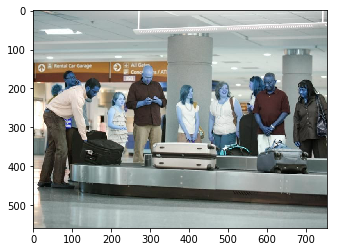

In [8]:
plt.imshow(image)
plt.show()

In [9]:
# determine only the output layer name
layer_name = net.getLayerNames()
layer_name = [layer_name[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [10]:
# Construct the bounding boxes
# Note_to_self_06 : what is 416,416 here??

blob = cv2.dnn.blobFromImage(image, (1.0/255.0), (416,416), swapRB = True, crop = False)

# Note_to_self_07: whats this ?
net.setInput(blob)

# start Time
start_time = time.time()

# pass the input image and then perform a forward pass of the 
# the yolo object detector

layer_output = net.forward(layer_name)

end_time = time.time()

print("[INFO] YOLO took {:.6f} seconds".format(end_time-start_time))

[INFO] YOLO took 1.187626 seconds


In [11]:
# list for detected bounding boxes, confidence, and class ID's 

# Bounding  
boxes = []
confidences = []
classIDs = []


In [12]:
for output in layer_output:
    
    for detection in output:
        
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        
        if confidence > confidence_score:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            
            x = int(centerX - (width/2))
            y = int(centerY - (height/2))
            
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

print('done')

done


In [13]:
# suppress weak boxes

idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence_score, threshold)
print('done')

done


In [ ]:
# initialize a list of colors to represent each possible class label
np.random.seed(194)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

if len(idxs) > 0:
    for i in idxs.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x,y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x,y - 5), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
cv2.imshow("Image", image)
cv2.waitKey(0)
    